In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


 Loading the dataset from excel file


In [90]:
dataset= pd.read_excel("D:/machine learning/compressive strength model/DATA 01 (3).xlsx")
dataset

,Refrences,Type of course Aggregate,Type of Fine Aggregate,Max. Size of Coarse Aggregate (mm),Passing 0.6 mm Sieve (%),Target Mean Strength (N/mm2),Cement O.P.C (Kg/m3),W/C Ratio,Water Content (Kg/m3),Additive Type & Dosage (/100 kg of cement),Total Aggregate (Kg/m3),Fine Aggregate (Kg/m3),Coarse Aggregate (Kg/m3),Strength (N/mm2) (28 days avg.)
0,NaN,Natural,Natural,40,66.5,38,350,0.51,180.00,NaN,1870.00,675.00,1195.0,20.7
1,NaN,Natural,Natural,40,60.6,38,350,0.51,180.00,NaN,1870.00,655.00,1215.0,21.0
2,NaN,Crushed,Natural,40,14.7,38,350,0.51,100.00,NaN,1870.00,690.00,1180.0,24.5
3,NaN,Natural,Natural,40,61.5,38,350,0.50,175.00,NaN,1875.00,675.00,1200.0,25.2
4,NaN,Natural,Natural,20,45.9,38,350,0.51,180.00,NaN,1870.00,690.00,1180.0,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,NaN,NaN,NaN,NaN,NaN,NaN,425,0.49,208.25,NaN,1474.75,548.25,926.5,44.7
867,NaN,NaN,NaN,NaN,NaN,NaN,450,0.44,198.00,NaN,1318.50,481.50,837.0,50.9
868,NaN,NaN,NaN,NaN,NaN,NaN,450,0.47,211.50,NaN,1426.50,526.50,900.0,48.1
869,NaN,NaN,NaN,NaN,NaN,NaN,475,0.42,199.50,NaN,1249.25,451.25,798.0,54.1


 separation of dataset as x and y

In [91]:
# print(dataset.columns)
y=dataset['Strength (N/mm2)             (28 days avg.)']
x = dataset.drop(['Strength (N/mm2)             (28 days avg.)', 'Type of course Aggregate','Refrences','Type of Fine Aggregate ','Max. Size of Coarse Aggregate (mm)',
                 'Passing 0.6 mm Sieve (%)','Target Mean Strength (N/mm2)', 'Additive Type & Dosage (/100 kg of cement)' ], axis=1)
x


,Cement O.P.C (Kg/m3),W/C Ratio,Water Content (Kg/m3),Total Aggregate (Kg/m3),Fine Aggregate (Kg/m3),Coarse Aggregate (Kg/m3)
0,350,0.51,180.00,1870.00,675.00,1195.0
1,350,0.51,180.00,1870.00,655.00,1215.0
2,350,0.51,100.00,1870.00,690.00,1180.0
3,350,0.50,175.00,1875.00,675.00,1200.0
4,350,0.51,180.00,1870.00,690.00,1180.0
...,...,...,...,...,...,...
866,425,0.49,208.25,1474.75,548.25,926.5
867,450,0.44,198.00,1318.50,481.50,837.0
868,450,0.47,211.50,1426.50,526.50,900.0
869,475,0.42,199.50,1249.25,451.25,798.0


splitting the dataset into x_train,y_train,x_test,y_test

In [92]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=100)

standardizing the dataset

In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


we will apply the linear regression on x_train

In [94]:
from sklearn.linear_model import LinearRegression
## cross validation
from sklearn.model_selection import cross_val_score

In [95]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
mse=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse

array([-29.360541  , -32.71940662, -29.94622256, -30.92447209,
       -38.56848616])

In [97]:
lr_pred= lr.predict(x_test)
lr_pred

array([52.69685959, 43.19706201, 54.82087266, 31.87588833, 35.58988069,
       36.9393584 , 39.50814929, 61.88834301, 35.48678215, 45.41608903,
       48.75648069, 36.31517417, 38.90497208, 42.27915736, 40.0134172 ,
       41.2982218 , 39.32818341, 41.21109748, 49.07054676, 37.26017314,
       61.77084   , 56.3391649 , 37.32579257, 39.32818341, 38.97036838,
       35.94966724, 37.87665885, 37.52600334, 49.68095156, 37.21742507,
       38.68054276, 51.84221535, 62.89307184, 41.64901901, 48.11471316,
       57.45289203, 40.1592475 , 38.0376893 , 35.1085592 , 48.01840652,
       36.50120876, 41.39447027, 49.59124654, 35.41005815, 50.56362377,
       33.96093004, 38.82446158, 50.94635536, 37.21742507, 48.21437719,
       41.65140108, 32.59673714, 57.40340635, 38.02780089, 40.69805123,
       36.97081557, 53.62928944, 38.9773862 , 43.37599639, 39.50072136,
       38.67059064, 44.99002548, 37.20780889, 38.46093716, 51.70665233,
       39.79608285, 56.39028448, 34.65371406, 40.73485215, 38.27

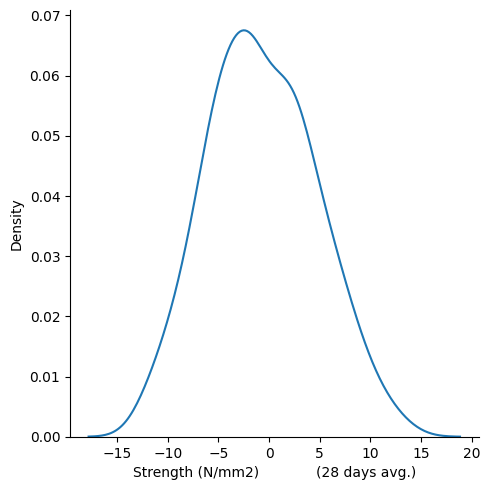

In [100]:
import seaborn as sns
sns.displot(lr_pred-y_test,kind='kde')